# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Guzga Adrian-Dumitru - __[adrian-dumitru.guzga@ulb.be](mailto:adrian-dumitru.guzga@ulb.be) - Student ID 460513__
### Martis William - __[william.martis@ulb.be](william.martis@ulb.be) - Student ID 441157__
### Schmidt Xavier - __[xavier.schmidt@ulb.be](xavier.schmidt@ulb.be) - Student ID 445723__

### Video presentation: www.youtube.com/doge_shiba_cummies_to_the_moon

## INFO-F-422 - Statistical foundations of machine learning 2020-2021 project


# Predicting the functional status of water pumps in Tanzania



# Introduction 

The largest country in East Africa, with no less than 60 million inhabitants, has been facing a major social problem for years. According to the Tanazanian ministry of water, more than 47% of its inhabitants do not have access to drinking water. Despite numereous financial aids from other countries and organizations, the Tanzanian government is unable to provide concrete solution to this social crisis. A large part of the water pumps present on the territory are not functional or need repaire work. This issues forcing the inhabitants of the country to walk several kilometers to reach the nearest functional pum and/or forcing them to drink non-drinking and foul water.

The main objective of this project is therefore to predict the functionality of the water pumps based on data provided by the Taarifa website and the Tanzanian ministry.

The present work will be divided into three parts: The first one being the implementation of a pipeline for the preprocessing of the data and the feature selection. The second part includes the implementation and the performance testing of three machine learning models on the training set, namely; a RandomForest model, a Neural Network model and a Support Vector Machine model. Finally, the last part of this project will include the implementation and the performance assessment of a deep neural network.



In [3]:
library(rlang)
library(dummies)
library(stringdist)
library(dplyr)
library(randomForest)
library(ggplot2)

dummies-1.5.6 provided by Decision Patterns


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin



# Data Exploration

For this project, there are three data sets available:

-  labels data set : The target variable of the analysis which gives us information on the functional status of the water pump. The water pumps are either functional, non-functional, or functional but need repair.
      
- training data set : The independent variables for the training set. It consists of a total of 40 predictor variables(including 3 so-called administrative variables).
      
- test data set : Data for which our models have to performed with the objective of predicting the functionality of the pumps.


In [4]:
df <- read.csv("training_data.csv", stringsAsFactors=T, header = TRUE, strip.white = TRUE, sep = ",")
df_labels <- read.csv("training_labels.csv", stringsAsFactors=F, header = TRUE, strip.white = TRUE, sep = ",")


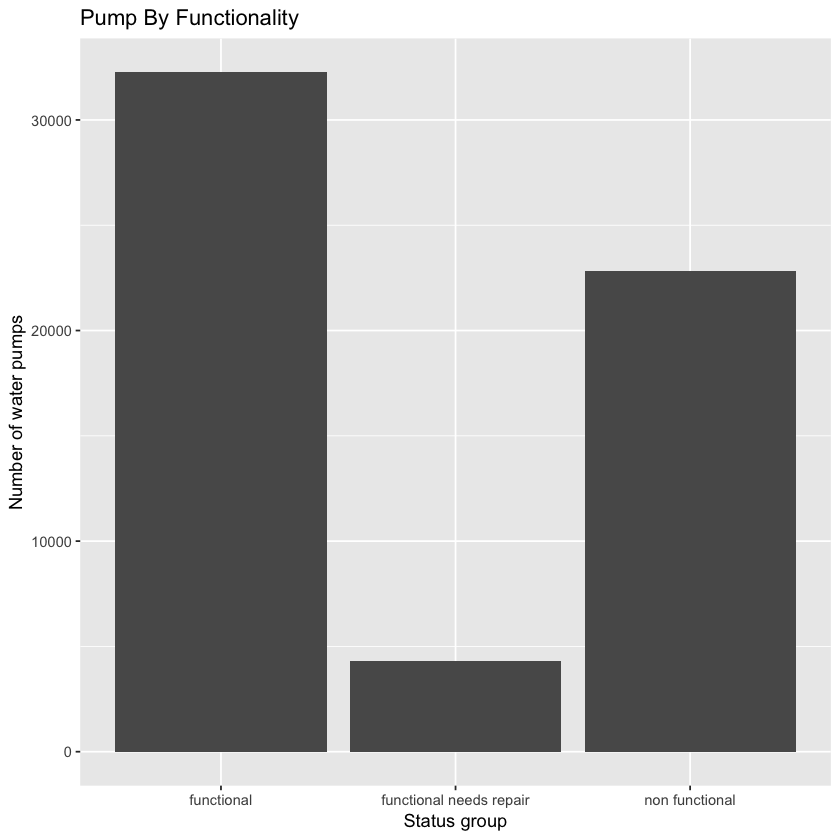

In [5]:
#A quick view at the number of functional, non-functional or pumps that require repaire work.
# The functional scenario of the pump status is the following: 
# A total of 54.31% of Functional pumps, 38.42% of non-functional pumps and 7.27% of functional pumps that need repair work.

labels<-c(df_labels$status_group)
ggplot(data.frame(labels), aes(x=labels))+ geom_bar()+labs(title="Pump By Functionality",
                                                           y="Number of water pumps", 
                                                           x="Status group")


In [6]:
#Converting all the data to lowercase
lowercase_all = function(df) {
    for(column in names(df)) {
        columnClass = class(df[,column])
        if(columnClass == "factor") {
            df[,column] <<- tolower(df[,column])
        }
    }
}
lowercase_all(df)
df

id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
69572,6000,14/03/2011,roman,1390,roman,34.93809,-9.85632177,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0,06/03/2013,grumeti,1399,grumeti,34.69877,-2.14746569,zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25,25/02/2013,lottery club,686,world vision,37.46066,-3.82132853,kwa mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0,28/01/2013,unicef,263,unicef,38.48616,-11.15529772,zahanati ya nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0,13/07/2011,action in a,0,artisan,31.13085,-1.82535885,shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
9944,20,13/03/2011,mkinga distric coun,0,dwe,39.17280,-4.76558728,tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
19816,0,01/10/2012,dwsp,0,dwsp,33.36241,-3.76636472,kwa ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
54551,0,09/10/2012,rwssp,0,dwe,32.62062,-4.22619802,tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
53934,0,03/11/2012,wateraid,0,water aid,32.71110,-5.14671181,kwa ramadhan musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
46144,0,03/08/2011,isingiro ho,0,artisan,30.62699,-1.25705061,kwapeto,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


# Features 

In [7]:
### First statistics about the dataframe:

str(df)

'data.frame':	59400 obs. of  40 variables:
 $ id                   : int  69572 8776 34310 67743 19728 9944 19816 54551 53934 46144 ...
 $ amount_tsh           : num  6000 0 25 0 0 20 0 0 0 0 ...
 $ date_recorded        : chr  "14/03/2011" "06/03/2013" "25/02/2013" "28/01/2013" ...
 $ funder               : chr  "roman" "grumeti" "lottery club" "unicef" ...
 $ gps_height           : int  1390 1399 686 263 0 0 0 0 0 0 ...
 $ installer            : chr  "roman" "grumeti" "world vision" "unicef" ...
 $ longitude            : num  34.9 34.7 37.5 38.5 31.1 ...
 $ latitude             : num  -9.86 -2.15 -3.82 -11.16 -1.83 ...
 $ wpt_name             : chr  "none" "zahanati" "kwa mahundi" "zahanati ya nanyumbu" ...
 $ num_private          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ basin                : chr  "lake nyasa" "lake victoria" "pangani" "ruvuma / southern coast" ...
 $ subvillage           : chr  "mnyusi b" "nyamara" "majengo" "mahakamani" ...
 $ region               : chr  "iringa" "mara" "

The analysis of the different features indicates several features containing similar representation of data. A first selection of features needs to be performed in order to mitigate the risk of overfitting our data. For each group of identical and similar features, only one of the variable will be selected. The groups of features includes;
- extraction_type, extraction_type_group, extraction_type_class
- payment, payment_type
- water_quality, quality_group
- source, source_class
- subvillage, region, region_code, district_code, lga, ward
- waterpoint_type, waterpoint_type_group

In a second phase, the so-called administrative variables used for reference purpose will not be used as predictor and will therefore be dropped of our prediction model. Those features are the ID, Date_recorded & Recorded_by.




## Numerical features 

In [8]:
#Split between numerical and categorical features
categorical_features<-which(sapply(df[1,],class)=="character"|sapply(df[1,],class)=="factor"|sapply(df[1,],class)=="logical")
df_numeric<-df[,-categorical_features]

       id          amount_tsh         gps_height       longitude    
 Min.   :    0   Min.   :     0.0   Min.   : -90.0   Min.   : 0.00  
 1st Qu.:18520   1st Qu.:     0.0   1st Qu.:   0.0   1st Qu.:33.09  
 Median :37062   Median :     0.0   Median : 369.0   Median :34.91  
 Mean   :37115   Mean   :   317.7   Mean   : 668.3   Mean   :34.08  
 3rd Qu.:55656   3rd Qu.:    20.0   3rd Qu.:1319.2   3rd Qu.:37.18  
 Max.   :74247   Max.   :350000.0   Max.   :2770.0   Max.   :40.35  
    latitude        num_private         region_code   district_code  
 Min.   :-11.649   Min.   :   0.0000   Min.   : 1.0   Min.   : 0.00  
 1st Qu.: -8.541   1st Qu.:   0.0000   1st Qu.: 5.0   1st Qu.: 2.00  
 Median : -5.022   Median :   0.0000   Median :12.0   Median : 3.00  
 Mean   : -5.706   Mean   :   0.4741   Mean   :15.3   Mean   : 5.63  
 3rd Qu.: -3.326   3rd Qu.:   0.0000   3rd Qu.:17.0   3rd Qu.: 5.00  
 Max.   :  0.000   Max.   :1776.0000   Max.   :99.0   Max.   :80.00  
   population      construc

In [9]:
# Amount_tsh - Total static head (amount water available to waterpoint)
# The column contains a significant quantity of invalid data values represented by 0.
# Out of 59,400 records, 41,639 of them have a null value, which represents approximatively 70% of the observations.

summary(df$amount_tsh)

test = as.data.frame(table(df$amount_tsh))
test[order(-test$Freq),]
dim(test)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     0.0      0.0      0.0    317.7     20.0 350000.0 

,Var1,Freq
1,0,41639
35,500,3102
20,50,2472
44,1000,1488
13,20,1463
27,200,1220
25,100,816
10,10,806
16,30,743
49,2000,704


[1] 98  2

In [ ]:
# GPS_Height - altitude of the well - contains a significant quantity of invalid data values represented by 0 and negative numbers.
# Out of 59,400 records, 20438 of them have a null value, which represents approximatively 35% of the observations.


summary(df$gps_height)

test = as.data.frame(table(df$gps_height))
test[order(-test$Freq),]
dim(test)

In [ ]:
# Num_private contains a significant quantity of invalid data values represented by 0.
# Out of 59,400 records, 58,643 of them have a null value, which represents approximatively 99% of the observations.


summary(df$num_private)

test = as.data.frame(table(df$num_private))
test[order(-test$Freq),]
dim(test)

In [ ]:
# Region_code - Geographic location (coded) - has a total of 27 different outputs with no 0/NA value. 
test = as.data.frame(table(df$region_code))
test[order(-test$Freq),]
dim(test)

In [ ]:
# District - Geographic location (coded) - has a total of 20 different outputs.
test = as.data.frame(table(df$district_code))
test[order(-test$Freq),]
dim(test)

In [ ]:
# Population - Population around the well -  contains a significant quantity of invalid data values represented by 0.
# Out of 59,400 records, 21381 of them have a null value, which represents approximatively 35% of the observations.
# The second value with the highest frequence is "1" - which appears to be an invalid value while talking about human population in the area surrounding a water pump. 
# 

summary(df$population)
hist(df$population)

test = as.data.frame(table(df$population))
test[order(-test$Freq),]
dim(test)



summary(df$population[df$population>0])
df_pop<- df$population[df$population>1]
hist(df_pop)

In [ ]:
#Construction_years - Year the waterpoint was constructed - contains a significant quantity of invalid/incomplete data represented by 0.
# Out of 59,400 records, 20709 of them have a null value, which represents approximatively 35% of the observations.
# Valid values are between 1960 - 2013


test = as.data.frame(table(df$construction_year))
test[order(-test$Freq),]
dim(test)

df_year<- df$construction_year[df$construction_year > 0]
hist(df_year)

In [ ]:
#install.packages('corrplot')
#library(corrplot)
mcor<-cor(df_numeric)
mcor

corrplot(mcor, type="upper", order="hclust", tl.col="black", tl.srt=45)

## Categorical features

In [10]:
#categorical features
str(df[,categorical_features])

'data.frame':	59400 obs. of  30 variables:
 $ date_recorded        : chr  "14/03/2011" "06/03/2013" "25/02/2013" "28/01/2013" ...
 $ funder               : chr  "roman" "grumeti" "lottery club" "unicef" ...
 $ installer            : chr  "roman" "grumeti" "world vision" "unicef" ...
 $ wpt_name             : chr  "none" "zahanati" "kwa mahundi" "zahanati ya nanyumbu" ...
 $ basin                : chr  "lake nyasa" "lake victoria" "pangani" "ruvuma / southern coast" ...
 $ subvillage           : chr  "mnyusi b" "nyamara" "majengo" "mahakamani" ...
 $ region               : chr  "iringa" "mara" "manyara" "mtwara" ...
 $ lga                  : chr  "ludewa" "serengeti" "simanjiro" "nanyumbu" ...
 $ ward                 : chr  "mundindi" "natta" "ngorika" "nanyumbu" ...
 $ public_meeting       : logi  TRUE NA TRUE TRUE TRUE TRUE ...
 $ recorded_by          : chr  "geodata consultants ltd" "geodata consultants ltd" "geodata consultants ltd" "geodata consultants ltd" ...
 $ scheme_management

In [ ]:
#Wpt_name - Name of the waterpoint if there is one -  contains almost 37400 different values. 
#Given this large number of different outputs (with respect to the total number of records), one could argue that the Wpt_name variable will bring low value (if any) to our prediction model, and can therefore be dropped.


test = as.data.frame(table(df$wpt_name))
test[order(-test$Freq),]
dim(test)



In [13]:
#Basin - Geographic water basin -
#The feature splits the data set into 9 substantial groups (with more than 2450 observations per group) with no invalid record.
test = as.data.frame(table(df$basin))
test[order(-test$Freq),]
dim(test)

,Var1,Freq
5,lake victoria,10248
6,pangani,8940
7,rufiji,7976
1,internal,7785
4,lake tanganyika,6432
9,wami / ruvu,5987
2,lake nyasa,5085
8,ruvuma / southern coast,4493
3,lake rukwa,2454


[1] 9 2

In [69]:
#Subvillage - Geographic location - contains almost 19300 unique values. 
#Given this large number of possible subvillage values, the variable will likely present very few or no value to our prediction model.

test = as.data.frame(table(df$subvillage))
test[order(-test$Freq),]
dim(test)



[1] 19288     2

Var1,Freq
,371
'a' kati,1
##,1
1,132
14kambalage,5
18,1
19,3
20,1
22b,1
23b,1


In [27]:
#Region - Geographic location
#The table lists a total of 21 different values with no invalid records within the dataset 
test = as.data.frame(table(df$region))
test[order(-test$Freq),]
dim(test)



,Var1,Freq
4,iringa,5294
18,shinyanga,4982
11,mbeya,4639
7,kilimanjaro,4379
12,morogoro,4006
1,arusha,3350
5,kagera,3316
14,mwanza,3102
6,kigoma,2816
17,ruvuma,2640


[1] 21  2

In [ ]:
#Lga - Geographic location
#Lga presents a large number of possible values with very low frequencies. 
#The tables hereunder shows us that for both features, the frequencies of the most occurent values do not exceed 5%. Given this, we can drop those two variables as it will give little or none value to our prediction.
test = as.data.frame(table(df$lga))
test[order(-test$Freq),]
dim(test)




In [ ]:
#Ward - Geographic location
#Ward presents a large number of possible values with very low frequencies. 
#The tables hereunder shows us that for both features, the frequencies of the most occurent values do not exceed 5%. Given this, we can drop those two variables as it will give little or none value to our prediction.
test = as.data.frame(table(df$lga))
test[order(-test$Freq),]
dim(test)

In [ ]:
#Public meeting is a boolean variable with approximatively 85% of true values, less than 10% of false records and 5% of incomplete data.
test = as.data.frame(table(df$public_meeting))
test[order(-test$Freq),]
dim(test)


In [25]:
#scheme_management - Who operates the waterpoint
# The table indicates a total of 13 distinct values with 3,877 records having invalid value.
test = as.data.frame(table(df$scheme_management))
test[order(-test$Freq),]
dim(test)

,Var1,Freq
9,vwc,36793
13,wug,5206
1,,3877
10,water authority,3153
12,wua,2883
11,water board,2748
5,parastatal,1680
6,private operator,1063
2,company,1061
4,other,766


[1] 13  2

In [ ]:
#scheme_name - Who operates the waterpoint
#The table indicates  a total of 2,697 distinct values  with 28,166 records having invalid value
test = as.data.frame(table(df$scheme_name))
test[order(-test$Freq),]
dim(test)

In [ ]:
#Permit is boolean variable with approximatively 65% of True values, 30% of False and 5% of unknown records.
test = as.data.frame(table(df$permit))
test[order(-test$Freq),]
dim(test)

In [12]:
#Funder - who funded the well -
# The table indicates a total of 1898 distinc values with 3,635 records having invalid value
test = as.data.frame(table(df$funder))
test[order(-test$Freq),]
dim(test)



,Var1,Freq
458,government of tanzania,9084
1,,3635
263,danida,3114
515,hesawa,2202
1418,rwssp,1374
1867,world bank,1349
729,kkkt,1287
1869,world vision,1246
1743,unicef,1057
1635,tasaf,877


[1] 1898    2

In [26]:
#Installer - Organization that installed the well:
# The table indicates a total of 2,146 distinc values with 3,655 missing values
test = as.data.frame(table(df$installer))
test[order(-test$Freq),]
dim(test)



,Var1,Freq
387,dwe,17405
1,,3655
513,government,1891
585,hesawa,1395
1448,rwe,1206
263,commu,1065
313,danida,1050
362,district council,961
802,kkkt,910
3,0,777


[1] 1936    2

In [ ]:
#extraction_type - The kind of extraction the waterpoint uses
#By analyzing the different outputs and their relative frequencies, one can identify that the 3 features have a high degree of similarity.
#Indeed, the extraction_type_class categorizes the data into 7 groups, while the extraction_type and in the extraction_type_group divide the outputs in respectively 18 and 13 categories.
test = as.data.frame(table(df$extraction_type))
test[order(-test$Freq),]
dim(test)

In [ ]:
#extraction_type_group - The kind of extraction the waterpoint uses
#By analyzing the different outputs and their relative frequencies, one can identify that the 3 features have a high degree of similarity.
#Indeed, the extraction_type_class categorizes the data into 7 groups, while the extraction_type and in the extraction_type_group divide the outputs in respectively 18 and 13 categories.
test = as.data.frame(table(df$extraction_type_group))
test[order(-test$Freq),]
dim(test)

In [ ]:
#extraction_type_class - The kind of extraction the waterpoint uses
#By analyzing the different outputs and their relative frequencies, one can identify that the 3 features have a high degree of similarity.
#Indeed, the extraction_type_class categorizes the data into 7 groups, while the extraction_type and in the extraction_type_group divide the outputs in respectively 18 and 13 categories.Â
test = as.data.frame(table(df$extraction_type_class))
test[order(-test$Freq),]
dim(test)

In [ ]:
#management_group - How the waterpoint is managed
#The management group feature indicates a total of 5 different possible values within the data set. 
#The most occurent value is the "user_group" record and is associated with a frequency of almost 90%. The data set also includes 561 records with an unknown label.
test = as.data.frame(table(df$management_group))
test[order(-test$Freq),]
dim(test)



In [ ]:
#management - How the waterpoint is managed
#The management group feature indicates a total of 5 different possible values within the data set. The most occurent value is the "user_group" record and is associated with a frequency of almost 90%.
#The data set also includes 561 records with an unknown label.
test = as.data.frame(table(df$management))
test[order(-test$Freq),]
dim(test)




[1] 7 2

Var1,Freq
<fct>,<int>
never pay,25348
other,1054
pay annually,3642
pay monthly,8300
pay per bucket,8985
pay when scheme fails,3914
unknown,8157


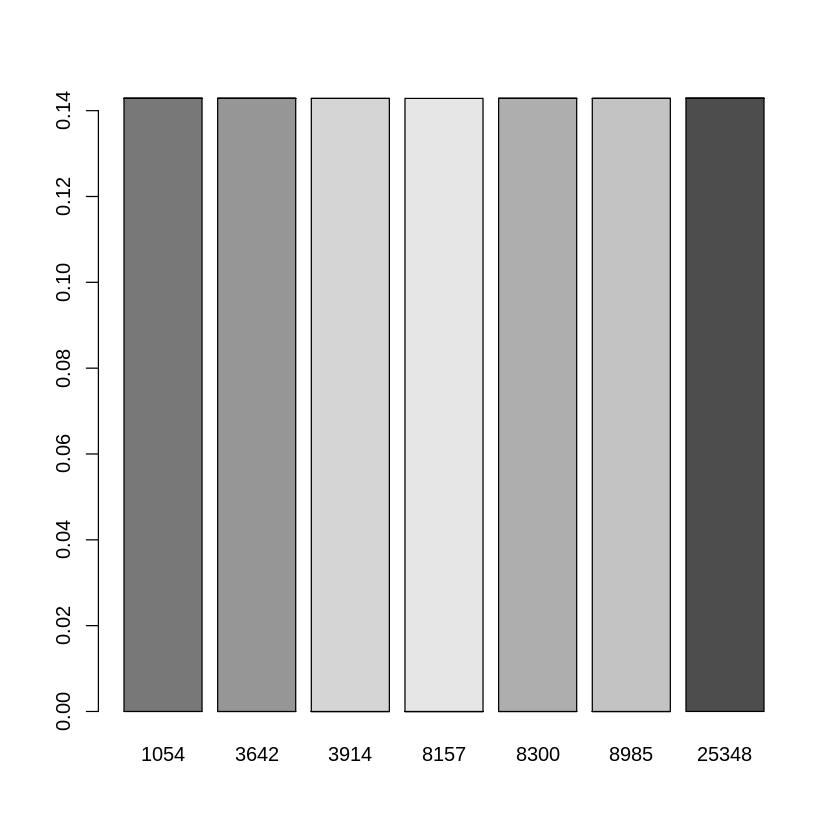

In [75]:
#payment - What the water costs
#The payment and the payment_type variables are 100% identical. It represents the payment method used by users of the water pump. Those variables classifies the different values into 7 distinct groups with the most frequent one being "never pay" and accounts for almost 45% of the data set. 
#In addition, 15% of the records are labelled as "unknown".
test = as.data.frame(table(df$payment))
test = test[order(-test$Freq),]
dim(test)



In [ ]:
#payment_type - What the water costs
#The payment and the payment_type variables are 100% identical. It represents the payment method used by users of the water pump. Those variables classifies the different values into 7 distinct groups with the most frequent one being "never pay" and accounts for almost 45% of the data set. 
#In addition, 15% of the records are labelled as "unknown".
test = as.data.frame(table(df$payment_type))
test[order(-test$Freq),]
dim(test)

In [16]:
#water_quality - The quality of the water
#"Water quality" & "Quality" contain the same values with the only difference being that in the "Water_quality" feature, a distinction is made between the following values leading to the creation of 2 extra categories;salty - salty abandoned fluoride - fluoride abandoned
#The most frequent value is soft and has a frequency of almost 85%. Values with "unknown" labels accounts for less than 5% of the data set.
test = as.data.frame(table(df$water_quality))
test[order(-test$Freq),]
dim(test)

,Var1,Freq
7,soft,50818
5,salty,4856
8,unknown,1876
4,milky,804
1,coloured,490
6,salty abandoned,339
2,fluoride,200
3,fluoride abandoned,17


[1] 8 2

In [15]:
#Quality_group - The quality of the water
#"Water quality" & "Quality" contain the same values with the only difference being that in the "Water_quality" feature, a distinction is made between the following values leading to the creation of 2 extra categories;salty - salty abandonedfluoride - fluoride abandoned
#The most frequent value is soft and has a frequency of almost 85%. Values with "unknown" labels accounts for less than 5% of the data set.
test = as.data.frame(table(df$quality_group))
test[order(-test$Freq),]
dim(test)


,Var1,Freq
3,good,50818
5,salty,5195
6,unknown,1876
4,milky,804
1,colored,490
2,fluoride,217


[1] 6 2

In [ ]:
#Quantity - The quantity of water
#Quantity and quantity_group features are 100% identical and represents the quantity of water available for each pump. Almost 50% of the records are labelled with the value "enough". In addition, the data set contains a small number of observations (<1,5%) with the label "unknown".
test = as.data.frame(table(df$quantity))
test[order(-test$Freq),]
dim(test)




In [17]:
#Quantity_group - The quantity of water
#Quantity and quantity_group features are 100% identical and represents the quantity of water available for each pump. Almost 50% of the records are labelled with the value "enough". In addition, the data set contains a small number of observations (<1,5%) with the label "unknown".
test = as.data.frame(table(df$quantity_group))
test[order(-test$Freq),]
dim(test)





,Var1,Freq
2,enough,33186
3,insufficient,15129
1,dry,6246
4,seasonal,4050
5,unknown,789


[1] 5 2

In [23]:
#source - The source of the water
# The summary indicates a total of 10 distinct values with each record having a valid value.
test = as.data.frame(table(df$source))
test[order(-test$Freq),]
dim(test)



,Var1,Freq
9,spring,17021
8,shallow well,16824
4,machine dbh,11075
7,river,9612
6,rainwater harvesting,2295
2,hand dtw,874
3,lake,765
1,dam,656
5,other,212
10,unknown,66


[1] 10  2

In [20]:
#source_type - The source of the water
# The summary indicates a total of 7 distinct values with each record having a valid value.
test = as.data.frame(table(df$source_type))
test[order(-test$Freq),]
dim(test)



,Var1,Freq
7,spring,17021
6,shallow well,16824
1,borehole,11949
5,river/lake,10377
4,rainwater harvesting,2295
2,dam,656
3,other,278


[1] 7 2

In [21]:
#source_class - The source of the water
# The summary indicates a total of 3 distinct values with each record having a valid value.
test = as.data.frame(table(df$source_class))
test[order(-test$Freq),]
dim(test)



Var1,Freq
groundwater,45794
surface,13328
unknown,278


[1] 3 2

In [ ]:
#waterpoint_type - The kind of waterpoint
#By analyzing the different outputs and their relative frequencies, one can identify that the two features are identical as they contain the same data with the sole difference that the communal standpipe output, which can be found in the "Waterpoint_type_group" is splitted into communal standpipe and communal standpipe multiple in the "Waterpoint_type" column.
#We therefore decided to select only one of those feature and we chose the "Water_point_group" as it presents a better categorization of the data, leading to a smaller number of outputs.

test = as.data.frame(table(df$waterpoint_type))
test[order(-test$Freq),]
dim(test)

In [18]:
#waterpoint_type_group - The kind of waterpoint
##By analyzing the different outputs and their relative frequencies, one can identify that the two features are identical as they contain the same data with the sole difference that the communal standpipe output, which can be found in the "Waterpoint_type_group" is splitted into communal standpipe and communal standpipe multiple in the "Waterpoint_type" column.
#We therefore decided to select only one of those feature and we chose the "Water_point_group" as it presents a better categorization of the data, leading to a smaller number of outputs.
test = as.data.frame(table(df$waterpoint_type_group))
test[order(-test$Freq),]
dim(test)


,Var1,Freq
2,communal standpipe,34625
4,hand pump,17488
6,other,6380
5,improved spring,784
1,cattle trough,116
3,dam,7


[1] 6 2

# Data preprocessing

## Cleaning data

After having analysed each initial feature of the dataset, we have observed that some categorical features had plenty of values that were either empty strings or did not make sense at all, such as as a zero or a simple dash in the column of installers of the dataframe. Additionally, some of the values were simply empty strings, that were read as such from the *csv* file, as well as some values that were just "unknown". Thus, because of the way in which we perform our missing value imputation, we have chosen to attribute a NA value to the entries' columns containing such wrongfully entered values.

### Geographical position of waterpumps

Because of how many faults we have found in the dataset, mispelled funders and installers, incomplete names etc, we could not rule out the possibility that some of the waterpumps would not actually be in Tanzania. In order to test our presumption, and act accordingly, we had to define an area represented by a square region containing Tanzania, represented by 2 points on Earth (longitude and latitude coordinates of upper right corner and lower left corner of the square), and check that each entry in the dataset actually belongs to that area. If it is the case, the corresponding entries will be kept, otherwise, they will be deleted from the dataset's corresponding dataframe. This has led to the identification and suppression of roughly 1500 entries in the dataset, which translates to 2.5% of it. 

In [40]:
#filter long/lat
x_up_right = 0.022
y_up_right = 40.729
x_down_left = -12.729
y_down_left = 28.138

df <- df[c(df$latitude > x_down_left & df$latitude < x_up_right & df$longitude > y_down_left & df$longitude < y_up_right), ]
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,69572,6000,14/03/2011,roman,1390,roman,34.93809,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2,8776,0,06/03/2013,grumeti,1399,grumeti,34.69877,-2.147466,zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
3,34310,25,25/02/2013,lottery club,686,world vision,37.46066,-3.821329,kwa mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
4,67743,0,28/01/2013,unicef,263,unicef,38.48616,-11.155298,zahanati ya nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
5,19728,0,13/07/2011,action in a,0,artisan,31.13085,-1.825359,shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
6,9944,20,13/03/2011,mkinga distric coun,0,dwe,39.17280,-4.765587,tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
7,19816,0,01/10/2012,dwsp,0,dwsp,33.36241,-3.766365,kwa ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
8,54551,0,09/10/2012,rwssp,0,dwe,32.62062,-4.226198,tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
9,53934,0,03/11/2012,wateraid,0,water aid,32.71110,-5.146712,kwa ramadhan musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump


## Missing value imputation

Our dataset has missing values, as any real world dataset does. Moreover, after obtaining the number of entries in the dataset that had at least one missing value, we oberved that approximately 45% of them had missing values. Dealing with missing values and obtaining a complete dataset represents a challenge, because there is a plenty of approaches that could be taken. Some approaches include: mean/median value imputation (especially used for numerical features), random sampling value imputation (especially used for categorical features), imputation using the most frequent value present in a feature or imputation based on similarity. We have opted for the latter option, as it made the most sense to look at similar entries in the dataset and change the missing values of another entry with the values contained in the most similar entry. Additionally, in this way, we do not need to treat differently the categorical or numerical features, as it would have been the case with performing the first two approaches for missing value imputation. We argue that the third option, based on frequency, adds too much bias towards the data, which can result in worse classifying rates later. 

In [41]:
work_on = setdiff(names(df), c("id"))
df
df[work_on][df[work_on] == 0 | df[work_on] == "-" | df[work_on] == "" | df[work_on] == "unknown"] = NA
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,69572,6000,14/03/2011,roman,1390,roman,34.93809,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2,8776,0,06/03/2013,grumeti,1399,grumeti,34.69877,-2.147466,zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
3,34310,25,25/02/2013,lottery club,686,world vision,37.46066,-3.821329,kwa mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
4,67743,0,28/01/2013,unicef,263,unicef,38.48616,-11.155298,zahanati ya nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
5,19728,0,13/07/2011,action in a,0,artisan,31.13085,-1.825359,shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
6,9944,20,13/03/2011,mkinga distric coun,0,dwe,39.17280,-4.765587,tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
7,19816,0,01/10/2012,dwsp,0,dwsp,33.36241,-3.766365,kwa ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
8,54551,0,09/10/2012,rwssp,0,dwe,32.62062,-4.226198,tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
9,53934,0,03/11/2012,wateraid,0,water aid,32.71110,-5.146712,kwa ramadhan musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,69572,6000,14/03/2011,roman,1390,roman,34.93809,-9.856322,none,NA,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2,8776,NA,06/03/2013,grumeti,1399,grumeti,34.69877,-2.147466,zahanati,NA,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
3,34310,25,25/02/2013,lottery club,686,world vision,37.46066,-3.821329,kwa mahundi,NA,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
4,67743,NA,28/01/2013,unicef,263,unicef,38.48616,-11.155298,zahanati ya nanyumbu,NA,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
5,19728,NA,13/07/2011,action in a,NA,artisan,31.13085,-1.825359,shuleni,NA,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
6,9944,20,13/03/2011,mkinga distric coun,NA,dwe,39.17280,-4.765587,tajiri,NA,...,per bucket,salty,salty,enough,enough,other,other,NA,communal standpipe multiple,communal standpipe
7,19816,NA,01/10/2012,dwsp,NA,dwsp,33.36241,-3.766365,kwa ngomho,NA,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
8,54551,NA,09/10/2012,rwssp,NA,dwe,32.62062,-4.226198,tushirikiane,NA,...,NA,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
9,53934,NA,03/11/2012,wateraid,NA,water aid,32.71110,-5.146712,kwa ramadhan musa,NA,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump


In [42]:
drops <- c("installer", "basin", "source", "payment_type", "region", "funder", "date_recorded", "gps_height", "wpt_name", "num_private", "lga", "ward", "subvillage", "region_code", "district_code", "recorded_by", "scheme_name", "waterpoint_type_group", "payment", "management", "management_group", "extraction_type_group", "extraction_type", "quantity_group", "quality_group", "amount_tsh", "population", "public_meeting", "scheme_management", "permit", "source_type", "source_class")
df = df[ , !(names(df) %in% drops)]
df

,id,longitude,latitude,construction_year,extraction_type_class,water_quality,quantity,waterpoint_type
,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
1,69572,34.93809,-9.856322,1999,gravity,soft,enough,communal standpipe
2,8776,34.69877,-2.147466,2010,gravity,soft,insufficient,communal standpipe
3,34310,37.46066,-3.821329,2009,gravity,soft,enough,communal standpipe multiple
4,67743,38.48616,-11.155298,1986,submersible,soft,dry,communal standpipe multiple
5,19728,31.13085,-1.825359,NA,gravity,soft,seasonal,communal standpipe
6,9944,39.17280,-4.765587,2009,submersible,salty,enough,communal standpipe multiple
7,19816,33.36241,-3.766365,NA,handpump,soft,enough,hand pump
8,54551,32.62062,-4.226198,NA,handpump,milky,enough,hand pump
9,53934,32.71110,-5.146712,NA,handpump,salty,seasonal,hand pump


To successfully perform missing value imputation based on similarity, we simply take a row of the dataframe containing all the entries that have missing values and we test the similarity of its complete features to the same features of each entry that is complete in the dataset. We have used the package stringdist in order to be able to correctly treat the cases in which a distance is needed to be commputed for two words. We then take the index of the entry which has the smallest difference to the entry with missing values and insert in the original dataframe the values that needed to be completed, based on the ID of the entries.

In [18]:
sum(complete.cases(df)) #check how many rows contain at least one NA val
full_df <- na.omit(df)
dim(full_df)
full_df

[1] 37361

[1] 37361     8

,id,longitude,latitude,construction_year,extraction_type_class,water_quality,quantity,waterpoint_type
,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
1,69572,34.93809,-9.856322,1999,gravity,soft,enough,communal standpipe
2,8776,34.69877,-2.147466,2010,gravity,soft,insufficient,communal standpipe
3,34310,37.46066,-3.821329,2009,gravity,soft,enough,communal standpipe multiple
4,67743,38.48616,-11.155298,1986,submersible,soft,dry,communal standpipe multiple
5,19728,31.13085,-1.825359,1999,gravity,soft,seasonal,communal standpipe
6,9944,39.17280,-4.765587,2009,submersible,salty,enough,communal standpipe multiple
7,19816,33.36241,-3.766365,1999,handpump,soft,enough,hand pump
8,54551,32.62062,-4.226198,1999,handpump,milky,enough,hand pump
9,53934,32.71110,-5.146712,1999,handpump,salty,seasonal,hand pump


In [43]:
similarity_test_apply = function(line) {
    NAs = is.na(line)
    idxs = which(is.na(line))
            #print(df[names(df)[idxs]])
    line2 = line[-idxs]
    most_similar = full_df[which.min(Reduce(`+`,Map(stringdist, setdiff(line2, full_df[, -idxs]), line2, method='jaccard'))),]

    line[idxs] <- most_similar[idxs] 
    to_change = which(strtoi(df$id) == strtoi(line$id))
    assign('df',df,envir=.GlobalEnv)
    df[to_change, idxs] <<- most_similar[idxs]
        
}

In [44]:
na_df = dplyr::setdiff(df,full_df)
dim(na_df)

[1] 20234     8

In [ ]:
#testing similarity

start.time = Sys.time()
res = apply(na_df[1:nrow(na_df),], 1, similarity_test_apply)
round(Sys.time() - start.time,5)
write.csv(df, "similarity_imputation_df.csv")

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of length of shorter"
Warning message in mapply(FUN = f, ..., SIMPLIFY = FALSE):
"longer argument not a multiple of le

In [ ]:
good_df = read.csv("similarity_applied.csv", stringsAsFactors=T, header = TRUE, strip.white = TRUE, sep = ",")
clean = c("X")
good_df = good_df[ , !(names(good_df) %in% clean)]
good_df

id,installer,basin,region,construction_year,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type
<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
69572,roman,lake nyasa,iringa,1999,gravity,annually,soft,enough,spring,communal standpipe
8776,grumeti,lake victoria,mara,2010,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe
34310,world vision,pangani,manyara,2009,gravity,per bucket,soft,enough,dam,communal standpipe multiple
67743,unicef,ruvuma / southern coast,mtwara,1986,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple
19728,artisan,lake victoria,kagera,1999,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe
9944,dwe,pangani,tanga,2009,submersible,per bucket,salty,enough,other,communal standpipe multiple
19816,dwsp,internal,shinyanga,1999,handpump,never pay,soft,enough,machine dbh,hand pump
54551,dwe,lake tanganyika,shinyanga,1999,handpump,annually,milky,enough,shallow well,hand pump
53934,water aid,lake tanganyika,tabora,1999,handpump,never pay,salty,seasonal,machine dbh,hand pump


In [ ]:
df

,id,installer,basin,region,construction_year,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,69572,roman,lake nyasa,iringa,1999,gravity,annually,soft,enough,spring,communal standpipe
2,8776,grumeti,lake victoria,mara,2010,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe
3,34310,world vision,pangani,manyara,2009,gravity,per bucket,soft,enough,dam,communal standpipe multiple
4,67743,unicef,ruvuma / southern coast,mtwara,1986,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple
5,19728,artisan,lake victoria,kagera,1999,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe
6,9944,dwe,pangani,tanga,2009,submersible,per bucket,salty,enough,other,communal standpipe multiple
7,19816,dwsp,internal,shinyanga,1999,handpump,never pay,soft,enough,machine dbh,hand pump
8,54551,dwe,lake tanganyika,shinyanga,1999,handpump,annually,milky,enough,shallow well,hand pump
9,53934,water aid,lake tanganyika,tabora,1999,handpump,never pay,salty,seasonal,machine dbh,hand pump


## Feature engineering

### One-hot encoding

One-hot encoding is a feature enginnering method which concerns categorical features. More specifically, it refers to the process of encoding a categorical feature with $m$ unique values into $m$ features with binary encodings as values, which specify if the data belongs or not to the a certain unique value of the initial feature. One-hot encoding is generally suited for encoding categorical features whose unique values cannot be ordered in a specific manner. As a counterexample, a feature representing the size of a T-shirt has 4 unique values: S, M, L, XL. These values can be directly encoded by distributing a number from 0 to 3 to each size, in the order given above, because a certain order exists between these unique values. 

In the dataset we use, however, this is not the case. Certain features, such as the installer of the waterpump, contain unique values that cannot be ordered in a specific manner. If we were to encode those unique values into integers, that would automatically imply a sort of order between the values, which is not a good practice. It is just not possible to order the different installers of waterpumps in a certain way. Thus, for all the categorical features we have decided to apply the one-hot encoding scheme. This implicitly results in a higher dimensionality of the feature space. 



In [12]:
df_labels <- read.csv("training_labels.csv", stringsAsFactors=T, header = TRUE, strip.white = TRUE, sep = ",")

In [ ]:
good_df = df

In [ ]:
indx <- tail(names(sort(table(df$installer))),10)
print(indx)
to_change = which(!(good_df$installer %in% indx))
good_df[to_change, 'installer'] = 'other'
good_df

 [1] "central government" "kkkt"               "district council"  
 [4] "danida"             "commu"              "rwe"               
 [7] "hesawa"             "government"         "roman"             
[10] "dwe"               


,id,installer,basin,region,construction_year,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,69572,roman,lake nyasa,iringa,1999,gravity,annually,soft,enough,spring,communal standpipe
2,8776,other,lake victoria,mara,2010,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe
3,34310,other,pangani,manyara,2009,gravity,per bucket,soft,enough,dam,communal standpipe multiple
4,67743,other,ruvuma / southern coast,mtwara,1986,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple
5,19728,other,lake victoria,kagera,1999,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe
6,9944,dwe,pangani,tanga,2009,submersible,per bucket,salty,enough,other,communal standpipe multiple
7,19816,other,internal,shinyanga,1999,handpump,never pay,soft,enough,machine dbh,hand pump
8,54551,dwe,lake tanganyika,shinyanga,1999,handpump,annually,milky,enough,shallow well,hand pump
9,53934,other,lake tanganyika,tabora,1999,handpump,never pay,salty,seasonal,machine dbh,hand pump


In [ ]:
"(indx <- tail(names(sort(table(full_df$extraction_type_class))),17)
print(indx)
to_change = which(!(full_df$extraction_type %in% indx))
full_df[to_change, 'extraction_type'] = 'other'
full_df)"

[1] "(indx <- tail(names(sort(table(full_df$extraction_type_class))),17)\nprint(indx)\nto_change = which(!(full_df$extraction_type %in% indx))\nfull_df[to_change, 'extraction_type'] = 'other'\nfull_df)"

In [44]:
Merged_df = full_df

In [46]:
Merged_df<-merge(Merged_df,df_labels,by="id",all=FALSE)
dim(Merged_df)
#Merged_df
Merged_df = Merged_df[,2:ncol(Merged_df)] #no id's
Merged_df

[1] 37354    30

longitude,latitude,construction_year,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,⋯,quantity_insufficient,quantity_seasonal,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,status_group
<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
34.77072,-9.395642,2008,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,1,0,0,functional
37.14743,-3.187555,1999,1,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,functional
38.66364,-5.805746,2007,0,0,0,0,0,1,0,⋯,1,0,0,1,0,0,0,0,0,non functional
36.75623,-3.373772,2010,1,0,0,0,0,0,0,⋯,1,0,0,1,0,0,0,0,0,non functional
35.33371,-10.469638,1984,1,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,non functional
36.62429,-3.276274,2010,1,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,functional
39.73442,-10.569192,2012,0,0,1,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,functional
29.90178,-4.540705,1999,1,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,functional needs repair
39.08618,-6.985842,2010,0,0,0,1,0,0,0,⋯,0,0,0,1,0,0,0,0,0,functional


In [45]:
Merged_df = dummy.data.frame(Merged_df, sep="_")

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”


In [ ]:
#normalize long and lat
sum(complete.cases(Merged_df))

Merged_df <- transform(Merged_df, longitude = (longitude - min(longitude)) / (max(longitude) - min(longitude)))
Merged_df <- transform(Merged_df, latitude = (latitude - min(latitude)) / (max(latitude) - min(latitude)))

sum(complete.cases(Merged_df))
#Merged_df
#Merged_df

[1] 37354

[1] 37354

## Feature selection

In [ ]:
#df.pca <- prcomp(dftest_, center = TRUE,scale. = TRUE)
#summary(df.pca)

# Model selection

Once the data has been preprocessed, we have chosen to test the performance of three models on the training set, a RandomForest model, a Neural Network model and a Support Vector Machine model. To be able to correctly assess the performance of each model, we had to implement a validation procedure for each of the models. Once the results of the validation were computed, we could choose a model to further make the predictions on the dataset.


## Cross-Validation

We have decided to validate the models through cross-validation. As cross-validation technique, we have performed a K-Fold Cross-Validation on each model. For the parameters, we have set the variable $K=3$ and the training data on each fold represented 75% of the dataset, while the testing data for each fold represented 25% of the dataset. The partitioning of the dataset has been made in such a way that the models had enough data to train on, but still keeping enough "unseen" testing data so that the performance on the testing set remained relevant. In the next sections, we present the models we have used, their chosen parameters as well as the obtained results during the cross-validation process.



## Model 1 : Random Forest

The Random Forest model we have used has a number of 64 trees. 

In [19]:
Merged_df = full_df

In [14]:
Merged_df = dummy.data.frame(Merged_df, sep="_")

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"


In [20]:
Merged_df<-merge(Merged_df,df_labels,by="id",all=FALSE)
dim(Merged_df)
#Merged_df
Merged_df = Merged_df[,2:ncol(Merged_df)] #no id's
Merged_df

[1] 37354     9

longitude,latitude,construction_year,extraction_type_class,water_quality,quantity,waterpoint_type,status_group
<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<fct>
34.77072,-9.395642,2008,rope pump,soft,enough,hand pump,functional
37.14743,-3.187555,1999,gravity,soft,enough,communal standpipe,functional
38.66364,-5.805746,2007,submersible,salty,insufficient,communal standpipe,non functional
36.75623,-3.373772,2010,gravity,soft,insufficient,communal standpipe,non functional
35.33371,-10.469638,1984,gravity,soft,dry,communal standpipe,non functional
36.62429,-3.276274,2010,gravity,soft,enough,communal standpipe,functional
39.73442,-10.569192,2012,motorpump,soft,enough,communal standpipe multiple,functional
29.90178,-4.540705,1999,gravity,soft,enough,communal standpipe multiple,functional needs repair
39.08618,-6.985842,2010,other,salty abandoned,enough,communal standpipe,functional


In [22]:
#Target var not one hot encod - problem :( 3 one hot encod target features created - only one taken into consideration)
install.packages("randomForest")
library("randomForest")

n_trees <- 128
CV_folds = 3
CV_res_rf = rep(0, CV_folds)

for(i in 1:CV_folds) {
  df_idx <- sample(1:nrow(Merged_df))
  half_split <- floor(nrow(Merged_df)/4*3)
  target_variable <-ncol(Merged_df)

  train_data <- Merged_df[df_idx[1:half_split],]

  test_data <- Merged_df[df_idx[(half_split+1):nrow(Merged_df)],]
      
  model_rf <- randomForest(x=train_data[,-c(target_variable)],
                          y=as.factor(train_data[,c(target_variable)]),
                          xtest=test_data[,-c(target_variable)],
                          ytest=as.factor(test_data[,c(target_variable)]),
                          ntree=n_trees, do.trace=T)

  CV_res_rf[i] = ((model_rf$test$confusion[1,1]+model_rf$test$confusion[2,2])/sum(model_rf$test$confusion))
}

RF_acc = mean(CV_res_rf)

RF_acc

#plot(accuracy_vec,main = "Number of trees influence",xlab = "Nbr of trees",ylab = "Classification rate") 

Warning message:
"package 'randomForest' is in use and will not be installed"


ntree      OOB      1      2      3|    Test      1      2      3
    1:  24.67% 12.98% 75.80% 33.68%|  27.29% 13.71% 73.11% 41.55%
    2:  25.18% 12.89% 76.82% 35.21%|  28.40% 12.33% 74.69% 46.60%
    3:  25.29% 13.57% 75.09% 34.70%|  25.11% 11.79% 73.29% 38.53%
    4:  24.96% 12.66% 77.03% 34.76%|  24.82%  9.54% 76.10% 40.89%
    5:  24.65% 12.05% 77.77% 34.69%|  24.52%  9.97% 76.98% 39.22%
    6:  24.32% 11.22% 78.38% 35.00%|  24.19%  8.35% 78.03% 40.74%
    7:  23.88% 10.85% 77.59% 34.45%|  24.09%  8.57% 79.09% 39.93%
    8:  23.64% 10.52% 78.56% 34.17%|  24.31%  8.75% 78.73% 40.29%
    9:  23.43% 10.08% 78.09% 34.37%|  23.58%  8.38% 80.14% 38.62%
   10:  23.16%  9.63% 78.75% 34.18%|  23.32%  7.76% 80.32% 38.89%
   11:  22.92%  9.56% 79.16% 33.57%|  23.17%  7.85% 80.67% 38.26%
   12:  22.73%  9.27% 79.72% 33.40%|  23.18%  7.72% 80.49% 38.53%
   13:  22.41%  8.96% 79.17% 33.11%|  22.83%  7.72% 79.96% 37.63%
   14:  22.26%  8.90% 78.81% 32.87%|  22.98%  7.44% 80.32% 38.44%
   15:  22

[1] 0.5566599

In [ ]:
###initial RF

df_idx <- sample(1:nrow(Merged_df))
half_split <- floor(nrow(Merged_df)/4*3)
target_variable <-ncol(Merged_df)


    #3.1 Take the first half of the dataset as a training data set
train_data <- Merged_df[df_idx[1:half_split],]

    #3.2 Take the second half of the dataset as a hold out or test data set
test_data <- Merged_df[df_idx[(half_split+1):nrow(Merged_df)],]
    
model_rf <- randomForest(x=train_data[,-c(target_variable)],
                         y=as.factor(train_data[,c(target_variable)]),
                         xtest=test_data[,-c(target_variable)],
                         ytest=as.factor(test_data[,c(target_variable)]),
                         ntree=n_trees, do.trace=T)


In [ ]:
y_pred_rf = predict(model_rf, newdata = test_data[,-target_variable])

ERROR: Error in predict.randomForest(model_rf, newdata = test_data[, -target_variable]): No forest component in the object


In [ ]:
print((model_rf$test$confusion[1,1]+model_rf$test$confusion[2,2])/sum(model_rf$test$confusion))

[1] 0.564218


## Model 2 : Neural Network

The neural network model that is offered by the *nnet* library of R is a rather simple MLP model. This is because it only has one hidden layer. The number of hidden nodes in the aforementioned layer was set to 256. One enhancement we have done with respect to the default setting was to use a softmax activation function instead of the default logistic activation function of the package. We have chosen to do so because softmax is normalized contrary to using multiple logistic functions and it has a tendency to greatly favour a single output, as its name suggests. We offer the formula of the softmax function in the lines below:

$Softmax(x_i) = \frac{exp(x_i)}{\sum_j {exp(x_j)}}$ where $exp$ represents the exponential function and $x$ represents the input vector, with index $j$ being different to index $i$.

In [50]:
Merged_df = full_df

In [51]:
Merged_df<-merge(Merged_df,df_labels,by="id",all=FALSE)
dim(Merged_df)
#Merged_df
Merged_df = Merged_df[,2:ncol(Merged_df)] #no id's
Merged_df

[1] 37354     9

longitude,latitude,construction_year,extraction_type_class,water_quality,quantity,waterpoint_type,status_group
<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<fct>
34.77072,-9.395642,2008,rope pump,soft,enough,hand pump,functional
37.14743,-3.187555,1999,gravity,soft,enough,communal standpipe,functional
38.66364,-5.805746,2007,submersible,salty,insufficient,communal standpipe,non functional
36.75623,-3.373772,2010,gravity,soft,insufficient,communal standpipe,non functional
35.33371,-10.469638,1984,gravity,soft,dry,communal standpipe,non functional
36.62429,-3.276274,2010,gravity,soft,enough,communal standpipe,functional
39.73442,-10.569192,2012,motorpump,soft,enough,communal standpipe multiple,functional
29.90178,-4.540705,1999,gravity,soft,enough,communal standpipe multiple,functional needs repair
39.08618,-6.985842,2010,other,salty abandoned,enough,communal standpipe,functional


In [52]:
Merged_df = dummy.data.frame(Merged_df, sep="_")

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”


In [60]:
library(nnet)

CV_folds = 3
CV_res_nn = rep(0, CV_folds)

for(i in 1:CV_folds) {
  df_idx <- sample(1:nrow(Merged_df))
  half_split <- floor(nrow(Merged_df)/3)

  train_data <- Merged_df[df_idx[1:half_split],]

  test_data <- Merged_df[df_idx[(half_split+1):nrow(Merged_df)],]

  hidden_nodes<-256
  threshold<-0.5
  target_variable <-c(ncol(Merged_df)-2,ncol(Merged_df)-1,ncol(Merged_df))

  model_nn<-nnet(x=train_data[,-target_variable],
                y=train_data[,target_variable],
                size=hidden_nodes,
                softmax=T,
                skip=FALSE,
                trace=T, 
                maxit=100,
                MaxNWts=100000,
                rang=0.5)

  Y_pred<-predict(model_nn,test_data[,-target_variable])

  y_hat_idx = cbind(1:nrow(Y_pred), max.col(Y_pred, 'first'))

  Y <- test_data[,target_variable]
  y_idx = cbind(1:nrow(Y), max.col(Y, 'first'))

  good_preds = which(y_hat_idx[,2] == y_idx[,2])
  n_good = length(good_preds)
  CV_res_nn[i] = n_good/nrow(Y)
}

NN_acc = mean(CV_res_nn)

NN_acc



# weights:  16387
initial  value 1400.177635 
iter  10 value 296.438255
final  value 296.438250 
converged
# weights:  16387
initial  value 838.106996 
iter  10 value 288.981388
iter  20 value 259.020235
iter  30 value 232.543513
iter  40 value 231.423090
iter  50 value 229.772594
iter  60 value 227.636645
iter  70 value 225.712319
iter  80 value 224.450582
iter  90 value 223.925012
iter 100 value 223.479543
final  value 223.479543 
stopped after 100 iterations
# weights:  16387
initial  value 4695.713436 
iter  10 value 277.117202
iter  20 value 273.003744
iter  30 value 258.591582
iter  40 value 211.352671
iter  50 value 193.606647
iter  60 value 187.920497
iter  70 value 183.480601
iter  80 value 179.709471
iter  90 value 178.491399
iter 100 value 178.301298
final  value 178.301298 
stopped after 100 iterations


[1] 0.6401799

In [59]:
###single Neural Net

df_idx <- sample(1:nrow(Merged_df))
half_split <- floor(nrow(Merged_df)/3)
target_variable <-ncol(Merged_df)


    #3.1 Take the first half of the dataset as a training data set
train_data <- Merged_df[df_idx[1:half_split],]

    #3.2 Take the second half of the dataset as a hold out or test data set
test_data <- Merged_df[df_idx[(half_split+1):nrow(Merged_df)],]

hidden_nodes<-512
threshold<-0.5
target_variable <-c(ncol(Merged_df)-2,ncol(Merged_df)-1,ncol(Merged_df))

model_nn<-nnet(x=train_data[,-target_variable],
               y=train_data[,target_variable],
               size=hidden_nodes,
               softmax=T,
               skip=FALSE,
               trace=T, 
               maxit=100,
               MaxNWts=100000,
               rang=0.5)

model_nn

Y_pred<-predict(model_nn,test_data[,-target_variable])



# weights:  16387
initial  value 1961.145010 
iter  10 value 296.019520
final  value 293.096412 
converged


a 28-512-3 network with 16387 weights
options were - softmax modelling 

In [ ]:
y_hat_idx = cbind(1:nrow(Y_pred), max.col(Y_pred, 'first'))

In [ ]:
Y <- test_data[,target_variable]
y_idx = cbind(1:nrow(Y), max.col(Y, 'first'))

In [ ]:
good_preds = which(y_hat_idx[,2] == y_idx[,2])
n_good = length(good_preds)
print(n_good/nrow(Y))

[1] 0.7198731


## Model 3 :  Support Vector Machine

For being able to predict the category in which a pump situates itself by using SVM, we needed to one-hot encode the corresponding categorical variable and implement an SVM to predict the confidence for an entry belonging to a single category. This means that in our case, we need three SVM models, each giving a confidence value for belonging to a category. Thus, for predicting the category of functionality of a water pump, we choose the category of the model which is the most confident in its prediction.

In [ ]:
library(e1071)

names(Merged_df)[(length(names(Merged_df))-1)]<-"status_group_functional_needs_repair"
names(Merged_df)[length(names(Merged_df))]<-"status_group_non_functional"
Merged_df

,longitude,latitude,construction_year,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,...,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,status_group_functional,status_group_functional_needs_repair,status_group_non_functional
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,34.77072,-9.395642,2008,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,37.14743,-3.187555,1999,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,38.66364,-5.805746,2007,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,36.75623,-3.373772,2010,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,35.33371,-10.469638,1984,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6,36.62429,-3.276274,2010,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
7,39.73442,-10.569192,2012,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
8,29.90178,-4.540705,1999,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9,39.08618,-6.985842,2010,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
df_idx <- sample(1:nrow(Merged_df))
half_split <- floor(nrow(Merged_df)/3)

#Merged_df

    #3.1 Take the first half of the dataset as a training data set
train_data <- Merged_df[df_idx[1:half_split],]

    #3.2 Take the second half of the dataset as a hold out or test data set
test_data <- Merged_df[df_idx[(half_split+1):nrow(Merged_df)],]

train_data

,longitude,latitude,construction_year,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,...,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,status_group_functional,status_group_functional_needs_repair,status_group_non_functional
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2337,34.55789,-8.889594,1978,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5696,40.10283,-10.362475,1985,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4184,37.49378,-3.259454,1972,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
27280,34.05835,-2.985020,1997,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
25978,35.53837,-4.400284,2005,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
31405,37.06902,-3.182809,2002,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
7015,37.37089,-3.271499,1978,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
28358,32.92054,-1.954410,2011,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
21581,38.67256,-7.909914,2003,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:


train_funct = train_data[,-which(names(train_data) == "status_group_functional_needs_repair" | names(train_data) == "status_group_non_functional")]
train_funct_rep = train_data[,-which(names(train_data) == "status_group_functional" | names(train_data) == "status_group_non_functional")]
train_non_funct = train_data[,-which(names(train_data) == "status_group_functional_needs_repair" | names(train_data) == "status_group_functional")]

test_funct = test_data[,-which(names(test_data) == "status_group_functional_needs_repair" | names(train_data) == "status_group_non_functional")]
test_funct_rep = test_data[,-which(names(test_data) == "status_group_functional" | names(train_data) == "status_group_non_functional")]
test_non_funct = test_data[,-which(names(test_data) == "status_group_functional_needs_repair" | names(train_data) == "status_group_functional")]

#DS<-cbind(train_funct,functional = train_funct[,ncol(train_funct)])

# Model fit (using lm function)
model_svm_f<- svm(status_group_functional~.,train_funct, probability=TRUE)

# Model prediction 
Y_hat_f<- predict(model_svm_f,test_funct, probability=TRUE)

#DS<-cbind(train_funct_rep,funct_rep = train_funct_rep[,ncol(train_funct_rep)])

# Model fit (using lm function)
model_svm_fr<- svm(status_group_functional_needs_repair~.,train_funct_rep,probability=TRUE)

# Model prediction 
Y_hat_fr<- predict(model_svm_fr,test_funct_rep,probability=TRUE)

#DS<-cbind(train_non_funct,non_functional = train_non_funct[,ncol(train_non_funct)])

# Model fit (using lm function)
model_svm_nf<- svm(status_group_non_functional~.,train_non_funct,probability=TRUE)

# Model prediction 
Y_hat_nf<- predict(model_svm_nf,test_non_funct,probability=TRUE)



In [ ]:
Y_hat_fr = data.frame(Y_hat_fr)
Y_hat_nf = data.frame(Y_hat_nf)
Y_hat_f = data.frame(Y_hat_f)
predictions = cbind(Y_hat_f, Y_hat_fr, Y_hat_nf)
predictions

,Y_hat_f,Y_hat_fr,Y_hat_nf
,<dbl>,<dbl>,<dbl>
1973,0.03734533,0.024583003,0.95743065
19338,0.04949075,0.024501842,0.95241654
22645,0.95196874,0.024793385,0.04709011
30193,0.67129059,0.024541414,0.19522522
8622,0.93225131,0.024748717,0.04721664
32160,0.02416605,0.024685810,0.96667140
24285,0.81602131,0.024772147,0.04794253
14922,0.90785718,-0.001969424,0.07487453
25324,1.00983783,0.024846575,0.04559847


In [ ]:
y_hat_idx_svm = cbind(1:nrow(predictions), max.col(predictions, 'first'))

In [ ]:
Y = test_data[,(ncol(test_data)-2):ncol(test_data)]
y_idx_svm = cbind(1:nrow(Y), max.col(Y, 'first'))

In [ ]:
train_funct

,region_arusha,region_iringa,region_kigoma,region_kilimanjaro,region_lindi,region_manyara,region_mara,region_morogoro,region_mtwara,region_mwanza,...,quantity_insufficient,quantity_seasonal,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,status_group_functional
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
5947,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
20097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
19987,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7245,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3123,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
9120,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
26480,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
23372,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3115,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
good_preds = which(y_hat_idx_svm[,2] == y_idx_svm[,2])
n_good = length(good_preds)
print(n_good/nrow(Y))

[1] 0.7320002


In [ ]:
dim(Merged_df)
sum(complete.cases(Merged_df))
Merged_df[1]

[1] 37354    31

[1] 37354

,longitude
,<dbl>
1,34.77072
2,37.14743
3,38.66364
4,36.75623
5,35.33371
6,36.62429
7,39.73442
8,29.90178
9,39.08618


In [58]:
###CV test
install.packages("e1071")
library(e1071)
CV_folds <- 3

Merged_df = Merged_df[1:1000, ]
Merged_df

N = nrow(Merged_df)


size_CV <-floor(N/CV_folds)

CV_res_svm = rep(0, CV_folds)

names(Merged_df)[(length(names(Merged_df))-1)]<-"status_group_functional_needs_repair"
names(Merged_df)[length(names(Merged_df))]<-"status_group_non_functional"

for (i in 1:CV_folds) {
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    test_data<-Merged_df[idx_ts,]  
    
    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    
    train_data <- Merged_df[idx_tr,]
     
    train_funct = train_data[,-which(names(train_data) == "status_group_functional_needs_repair" | names(train_data) == "status_group_non_functional")]
    train_funct_rep = train_data[,-which(names(train_data) == "status_group_functional" | names(train_data) == "status_group_non_functional")]
    train_non_funct = train_data[,-which(names(train_data) == "status_group_functional_needs_repair" | names(train_data) == "status_group_functional")]

    test_funct = test_data[,-which(names(test_data) == "status_group_functional_needs_repair" | names(train_data) == "status_group_non_functional")]
    test_funct_rep = test_data[,-which(names(test_data) == "status_group_functional" | names(train_data) == "status_group_non_functional")]
    test_non_funct = test_data[,-which(names(test_data) == "status_group_functional_needs_repair" | names(train_data) == "status_group_functional")]

    #DS<-cbind(train_funct,functional = train_funct[,ncol(train_funct)])

    # Model fit (using lm function)
    model_svm_f<- svm(status_group_functional~.,train_funct, probability=TRUE)

    # Model prediction 
    Y_hat_f<- predict(model_svm_f,test_funct, probability=TRUE)

    #DS<-cbind(train_funct_rep,funct_rep = train_funct_rep[,ncol(train_funct_rep)])

    # Model fit (using lm function)
    model_svm_fr<- svm(status_group_functional_needs_repair~.,train_funct_rep,probability=TRUE)

    # Model prediction 
    Y_hat_fr<- predict(model_svm_fr,test_funct_rep,probability=TRUE)

    #DS<-cbind(train_non_funct,non_functional = train_non_funct[,ncol(train_non_funct)])

    # Model fit (using lm function)
    model_svm_nf<- svm(status_group_non_functional~.,train_non_funct,probability=TRUE)

    # Model prediction 
    Y_hat_nf<- predict(model_svm_nf,test_non_funct,probability=TRUE)
     
    
    
    Y_hat_fr = data.frame(Y_hat_fr)
    Y_hat_nf = data.frame(Y_hat_nf)
    Y_hat_f = data.frame(Y_hat_f)
    predictions = cbind(Y_hat_f, Y_hat_fr, Y_hat_nf)
    # Cross validation error = Mean Squared Error
    
    y_hat_idx_svm = cbind(1:nrow(predictions), max.col(predictions, 'first'))
    Y = test_data[,(ncol(test_data)-2):ncol(test_data)]
    y_idx_svm = cbind(1:nrow(Y), max.col(Y, 'first'))
    
    good_preds = which(y_hat_idx_svm[,2] == y_idx_svm[,2])
    n_good = length(good_preds)
    accuracy = n_good/nrow(Y)
    
    CV_res_svm[i] = accuracy
}

SVM_acc = mean(CV_res_svm)

SVM_acc

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,longitude,latitude,construction_year,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,⋯,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,status_group_functional,status_group_functional_needs_repair,status_group_non_functional
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,34.77072,-9.395642,2008,0,0,0,0,1,0,0,⋯,0,0,0,0,1,0,0,1,0,0
2,37.14743,-3.187555,1999,1,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,1,0,0
3,38.66364,-5.805746,2007,0,0,0,0,0,1,0,⋯,0,1,0,0,0,0,0,0,0,1
4,36.75623,-3.373772,2010,1,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,1
5,35.33371,-10.469638,1984,1,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,1
6,36.62429,-3.276274,2010,1,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,1,0,0
7,39.73442,-10.569192,2012,0,0,1,0,0,0,0,⋯,0,0,1,0,0,0,0,1,0,0
8,29.90178,-4.540705,1999,1,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,1,0
9,39.08618,-6.985842,2010,0,0,0,1,0,0,0,⋯,0,1,0,0,0,0,0,1,0,0


Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘X.extraction_type_class_wind.powered.’ and ‘X.water_quality_fluoride.abandoned.’ and ‘waterpoint_type_dam’ constant. Cannot scale data.”
Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘X.extraction_type_class_wind.powered.’ and ‘X.water_quality_fluoride.abandoned.’ and ‘waterpoint_type_dam’ constant. Cannot scale data.”
Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘X.extraction_type_class_wind.powered.’ and ‘X.water_quality_fluoride.abandoned.’ and ‘waterpoint_type_dam’ constant. Cannot scale data.”
Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
“Variable(s) ‘X.extraction_type_class_wind.powered.’ and ‘X.water_quality_fluoride.abandoned.’ and ‘X.waterpoint_type_cattle.trough.’ and ‘waterpoint_type_dam’ constant. Cannot scale data.”
Warning message in svm.default(x,

[1] 0.6886887

# Alternative models





## Deep Neural Network model

As alternative model, we have chosen to use a deep neural network. This model was chosen because of the recent revolution of deep learning, as well as its close relation to the classic neural networks. As its name suggests, the model is "deep", meaning that is has multiple hidden layers, which is not the case with MLPs. Thus, it has significantly more parameters, making it, in theory, able to model very complex relationships in data. However, this has the tradeoff of making the models prone to overfitting data. Because of this, we use a validation set along the training set to be able to observe if the overfitting issue appears. If the accuracy on the validation set decreases at some point during training, but the training accuracy keeps increasing, it is one of the signs of an overfitting behaviour of the model.

In [12]:
install.packages("keras")
library(keras)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("keras"):
“installation of package ‘keras’ had non-zero exit status”


In [ ]:
good_df

id,installer,basin,region,construction_year,extraction_type_class,payment_type,water_quality,quantity,source,waterpoint_type
<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
69572,roman,lake nyasa,iringa,1999,gravity,annually,soft,enough,spring,communal standpipe
8776,grumeti,lake victoria,mara,2010,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe
34310,world vision,pangani,manyara,2009,gravity,per bucket,soft,enough,dam,communal standpipe multiple
67743,unicef,ruvuma / southern coast,mtwara,1986,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple
19728,artisan,lake victoria,kagera,1999,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe
9944,dwe,pangani,tanga,2009,submersible,per bucket,salty,enough,other,communal standpipe multiple
19816,dwsp,internal,shinyanga,1999,handpump,never pay,soft,enough,machine dbh,hand pump
54551,dwe,lake tanganyika,shinyanga,1999,handpump,annually,milky,enough,shallow well,hand pump
53934,water aid,lake tanganyika,tabora,1999,handpump,never pay,salty,seasonal,machine dbh,hand pump


In [13]:
Merged_df<-merge(full_df,df_labels,by="id",all=FALSE)
dim(Merged_df)



[1] 37354     9

In [14]:
Merged_df = Merged_df[,2:ncol(Merged_df)] #drop id when training, not a feature

In [15]:
Merged_df = dummy.data.frame(Merged_df, sep="_")
dim(Merged_df)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”


[1] 37354    31

In [16]:
Merged_df

,longitude,latitude,construction_year,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,⋯,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,status_group_functional,status_group_functional needs repair,status_group_non functional
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,34.77072,-9.395642,2008,0,0,0,0,1,0,0,⋯,0,0,0,0,1,0,0,1,0,0
2,37.14743,-3.187555,1999,1,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,1,0,0
3,38.66364,-5.805746,2007,0,0,0,0,0,1,0,⋯,0,1,0,0,0,0,0,0,0,1
4,36.75623,-3.373772,2010,1,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,1
5,35.33371,-10.469638,1984,1,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,1
6,36.62429,-3.276274,2010,1,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,1,0,0
7,39.73442,-10.569192,2012,0,0,1,0,0,0,0,⋯,0,0,1,0,0,0,0,1,0,0
8,29.90178,-4.540705,1999,1,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,1,0
9,39.08618,-6.985842,2010,0,0,0,1,0,0,0,⋯,0,1,0,0,0,0,0,1,0,0


In [17]:
library(tensorflow)

physical_devices = tf$config$list_physical_devices('GPU')
tf$config$experimental$set_memory_growth(physical_devices[[1]],TRUE)
tf$keras$backend$set_floatx('float32')

In [19]:
install_tensorflow(version='gpu')

ERROR: ignored

In [29]:
model <- keras_model_sequential() 
model %>% 
  layer_dense(units = 120, activation = 'relu', input_shape = c(27)) %>% 
  #layer_dropout(rate = 0.1) %>% 
  layer_dense(units = 140, activation = 'relu') %>%
  layer_dense(units = 150, activation = 'relu') %>%
  layer_dense(units = 90, activation = 'relu') %>%
  layer_dense(units = 80, activation = 'relu') %>%
  layer_dense(units = 75, activation = 'relu') %>%
  layer_dense(units = 40, activation = 'relu') %>%
  layer_dense(units = 20, activation = 'relu') %>%
  layer_dense(units = 10, activation = 'relu') %>%
  #layer_dropout(rate = 0.1) %>%
  layer_dense(units = 3, activation = 'softmax')

In [30]:
model %>% compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer_adam(),
  metrics = c('accuracy')
)

In [35]:
df_idx <- sample(1:nrow(Merged_df))
half_split <- floor(nrow(Merged_df)/4*3)
target_variables <-c((ncol(Merged_df)-2),(ncol(Merged_df)-1), ncol(Merged_df))


    #3.1 Take the first half of the dataset as a training data set
train_data <- Merged_df[df_idx[1:half_split],]
dim(train_data)

[1] 28015    31

In [37]:
x_train = train_data[,-target_variables]
y_train = train_data[,target_variables]


x_train = array_reshape(x_train, c(nrow(x_train), 28))
y_train = array_reshape(y_train, c(nrow(y_train), 3))
x_train = x_train[,2:ncol(x_train)]
x_train = data.matrix(x_train)
y_train = data.matrix(y_train)
dim(x_train)
dim(y_train)

[1] 28015    27

[1] 28015     3

In [40]:
history <- model %>% fit(
  x_train, y_train, 
  epochs = 200, batch_size = 128,
  validation_split = 0.2
)

`geom_smooth()` using formula 'y ~ x'



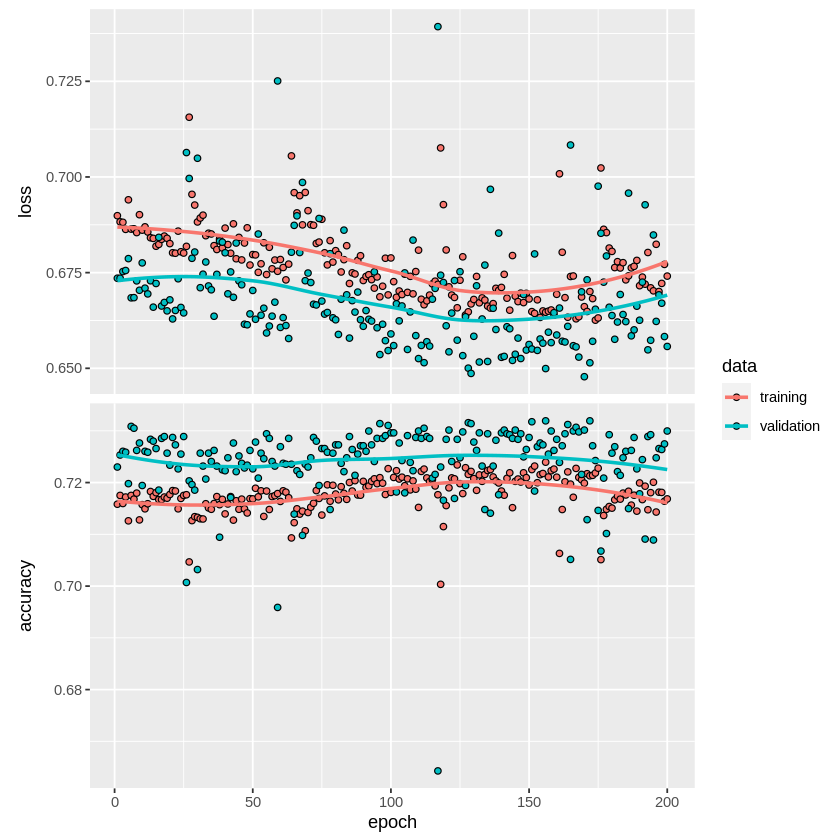

In [41]:
plot(history)

# Conclusions